In [8]:
datadir = './data'
outdir = './output'
filename_300old = '220226_001_300K.csv' # 300K
filename_77old = '220226_001_77K.csv' # 77K
filename_300new = '220223_001_300K.csv' # 300K,ここを測定値に変える.
filename_77new = '220223_001_77K.csv' # 77K,ここを測定値に変える.

room_temp = 287.5 # room temperature in the measurement,ここを測定値に変える.
k_B = 1.380649e-23  # boltzmann const. [J/K]
freq_min = 8 # [GHz]
freq_max = 18 # [GHz]

#csvType = 'Anritsu'; # Anritsu Spectrum analyzer: Waveform output
#csvType = 'Keysight'; # Keysight Spectrum Analyzer: output
csvType = 'TwoColumn'; # freq, dBm
#csvType = 'OneColumn'; # dBm 

# Define function to read csv datafile

In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt


def read_csv(filename, csvType, start_freq=None, stop_freq=None, npoints=None):
    
    freq = [] # frequency list [GHz]
    power = [] # power list  [mW]
    
    f = open(filename, 'r');
    fin = list(csv.reader(f))
    #print(fin)  #リストの中身を出力
    isData = False
    
    if csvType=='TwoColumn' : # Hz, dBm
        
        for line in fin:
            if len(line)==0 : continue
            first = line[0].strip()
            #print(f'first = {first}')
            if first[0]=='#':
                # skip line
                continue
            # Get data
            freq.append( float(line[0]) * 1.e-9 ) # Hz --> GHz
            power.append(10 ** (float(line[1])*0.1)) # dBm --> mW
            pass
        
    return np.array(freq), np.array(power)


def freq_average(data, naverage=100):

    ndata = len(data)
    npoints = int(ndata/naverage)
    
    data_ave = []
    data_err = []
    
    for i in range(npoints):
        data_subset = data[i*naverage:(i+1)*naverage]
        #average = np.mean(data_subset)
        average = np.median(data_subset)
        average_err = np.std(data_subset)/np.sqrt(naverage) #  = 1/N * sqrt( sum((y-mean)^2))  ( std = sqrt( sum((y-mean)^2) / N) )
        data_ave.append(average)
        data_err.append(average_err)
        pass
    
    return np.array(data_ave), np.array(data_err)


freq_300old, power_300old = read_csv(f'{datadir}/{filename_300old}', csvType)
freq_77old, power_77old = read_csv(f'{datadir}/{filename_77old}', csvType)
freq_300new, power_300new = read_csv(f'{datadir}/{filename_300new}', csvType)
freq_77new, power_77new = read_csv(f'{datadir}/{filename_77new}', csvType)

# Select data between freq_min and freq_max
power_300old = power_300old[freq_300old<=freq_max]
freq_300old = freq_300old[freq_300old<=freq_max]
power_300old = power_300old[freq_300old>=freq_min]
freq_300old = freq_300old[freq_300old>=freq_min]

power_77old = power_77old[freq_77old<=freq_max]
freq_77old = freq_77old[freq_77old<=freq_max]
power_77old = power_77old[freq_77old>=freq_min]
freq_77old = freq_77old[freq_77old>=freq_min]

power_300new = power_300new[freq_300new<=freq_max]
freq_300new = freq_300new[freq_300new<=freq_max]
power_300new = power_300new[freq_300new>=freq_min]
freq_300new = freq_300new[freq_300new>=freq_min]

power_77new = power_77new[freq_77new<=freq_max]
freq_77new = freq_77new[freq_77new<=freq_max]
power_77new = power_77new[freq_77new>=freq_min]
freq_77new = freq_77new[freq_77new>=freq_min]


print(freq_300old)
print(power_300old)
print(freq_77old)
print(power_77old)
print(freq_300new)
print(power_300new)
print(freq_77new)
print(power_77new)

[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00959893 0.00836218 0.00880378 ... 0.00211257 0.00210776 0.00246596]
[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00534565 0.00477181 0.00482939 ... 0.00155023 0.00144657 0.00149519]
[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00818065 0.01015442 0.00900742 ... 0.00176822 0.00152773 0.00155199]
[ 8.002033  8.004682  8.007331 ... 17.994061 17.99671  17.999359]
[0.00551734 0.00764375 0.00797966 ... 0.00098114 0.00099639 0.00110518]


# Plot Power [mW]

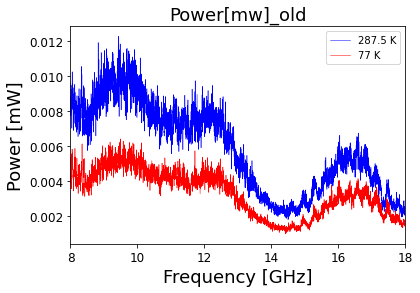

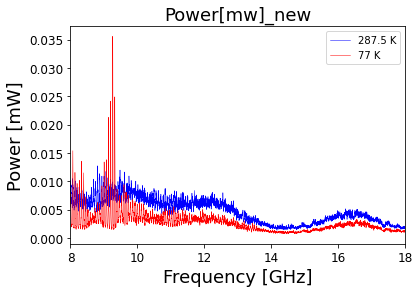

In [103]:
#plt.plot(freq_300, power_300, label=f'{room_temp} K', color='tab:blue', marker='o', markersize=0.5, linestyle='')
#plt.plot(freq_77, power_77, label=f'77 K', color='tab:red', marker='o', markersize=0.5, linestyle='')
plt.plot(freq_300old, power_300old, label=f'{room_temp} K', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.5)
plt.plot(freq_77old, power_77old, label=f'77 K', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.5)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(8,9) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.01) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Power[mw]_old',fontsize=18)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()


plt.plot(freq_300new, power_300new, label=f'{room_temp} K', color='blue', marker='', markersize=0.5, linestyle='-', linewidth=0.5)
plt.plot(freq_77new, power_77new, label=f'77 K', color='red', marker='', markersize=0.5, linestyle='-', linewidth=0.5)

plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
plt.ylabel('Power [mW]',fontsize=18) #y軸の名前
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.xlim(8,9) #x軸範囲指定
plt.xlim(freq_min,freq_max) #x軸範囲指定
#plt.ylim(0,0.01) #y軸範囲指定
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Power[mw]_new',fontsize=18)
plt.legend()

plt.savefig(f'{outdir}/power_mW.png')
plt.show()

# Plot Power [dBm]

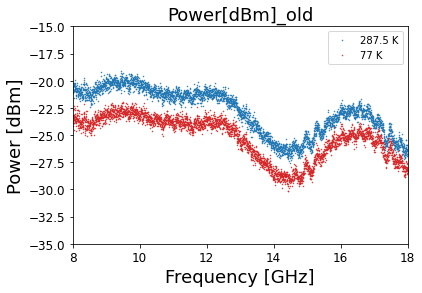

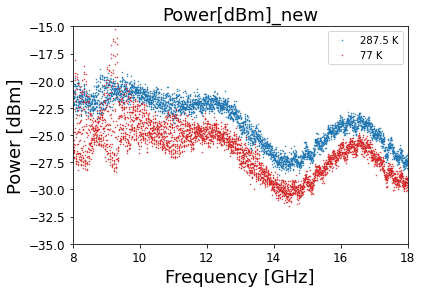

In [102]:
def PowerPlot(freq_300, freq_77, power_300, power_77):
    power_300_dBm = np.log10(power_300)*10.
    power_77_dBm = np.log10(power_77)*10.

    plt.plot(freq_300, power_300_dBm, label=f'{room_temp} K', color='tab:blue', marker='o', markersize=0.5, linestyle='')
    plt.plot(freq_77, power_77_dBm, label=f'77 K', color='tab:red', marker='o', markersize=0.5, linestyle='')

    plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
    plt.ylabel('Power [dBm]',fontsize=18) #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(-35,-15) #y軸範囲指定
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()

    plt.savefig(f'{outdir}/power_dBm.png')
    plt.show()

plt.title('Power[dBm]_old',fontsize=18)
PowerPlot(freq_300old, freq_77old, power_300old, power_77old)

plt.title('Power[dBm]_new',fontsize=18)
PowerPlot(freq_300new, freq_77new, power_300new, power_77new)

# Calculate gain & Trx (Y-factor claculation)

Y-factor calculation

もし、T の温度の暗室に測定系が存在したら、そこにある測定系が得られるパワーは(増幅はないものとして)

$$
P = k_B T B [W]
$$
- $k_B$: ボルツマン定数 [J/K]
- $T$ : 暗室の温度 [K]
- $B$ : バンド幅 = RBW (resolution band width) [Hz]


$T_{77}$ K と $T_{300}$ K の測定をした場合、
$$
\begin{align}
P_{300} &= G k_B (T_{rx} + T_{300}) \tag{1}\label{300} \\
P_{77}  &= G k_B (T_{rx} + T_{77}) \tag{2}\label{77}
\end{align}
$$
注) $G \propto B$ で $G$ に $B$ を含む
  
  
Y-factor は
$$ 
Y = \frac{P_{300}}{P_{77}} = \frac{T_{rx} + T_{300}}{T_{rx} + T_{77}} \\
\Leftrightarrow
T_{rx} = \frac{T_{300}-YT_{77}}{Y-1}  \tag{3}\label{Trx} \\
$$
また、(\ref{300}) - (\ref{77}) より
$$
\begin{align}
P_{300} - P_{77} &= G k_B (T_{300} - T_{77}) \\
\Leftrightarrow
G &= \frac{1}{k_B}\frac{P_{300}-P_{77}}{T_{300}-T_{77}}  \tag{4}\label{G}
\end{align}
$$ 

In [27]:
## Assume the same freq between 300K and 77K
if not np.all(freq_300new == freq_77new):
    print('Error! The frequency should be the same between 300K and 77K data files.')
    pass

freq = freq_300old
#Trx = power_300/(power_300-power_77) * (room_temp-77.) - room_temp
#gaink = (power_300-power_77)/(room_temp-77.) # Gain * k_B (boltzmann const.)
#gain = gaink / k_B

def Yfactor(power_300, power_77, T_300, T_77, err_power_300=None, err_power_77=None):
    Y = power_300/power_77
    Trx = (T_300-T_77)/(Y-1.)
    G = (power_300-power_77)/(T_300-T_77)/k_B
    err_Y = err_Trx = err_G = None
    if err_power_300 is not None and err_power_77 is not None:
        err_Y = np.sqrt( np.power(err_power_300/power_77, 2.) + np.power(Y/power_77*err_power_77,2.) )
        err_Trx = np.sqrt( np.power(Trx/(Y-1.)*err_Y, 2.) )
        err_G = np.sqrt( err_power_300**2. + err_power_77**2. )/(T_300-T_77)/k_B
        pass
    return [Trx, G],[err_Trx, err_G]

[Trx_old, G_old],[tmp,tmp] = Yfactor(power_300old, power_77old, room_temp, 77.)
[Trx_new, G_new],[tmp,tmp] = Yfactor(power_300new, power_77new, room_temp, 77.)

# Suppress negative value for G
G[G<=0.] = 1.e-100

In [29]:
# Print Trx, G
print(f'Trx_old = {Trx_old}')
print(f'Gain_old = {G_old}')

print(f'Trx_new = {Trx_new}')
print(f'Gain_new = {G_new}')

Trx_old = [264.56205189 279.76569307 255.78492463 ... 580.30409152 460.53482167
 324.21319349]
Gain_old = [1.46348861e+18 1.23539253e+18 1.36752202e+18 ... 1.93489800e+17
 2.27506288e+17 3.34027771e+17]
Trx_new = [ 436.07248336  640.86762816 1634.35765821 ...  262.40160755  394.73240517
  520.67269327]
Gain_new = [9.16405254e+17 8.63882516e+17 3.53634138e+17 ... 2.70820600e+17
 1.82827696e+17 1.53739613e+17]
[264.56205189 279.76569307 255.78492463 ... 580.30409152 460.53482167
 324.21319349]


# plot Trx

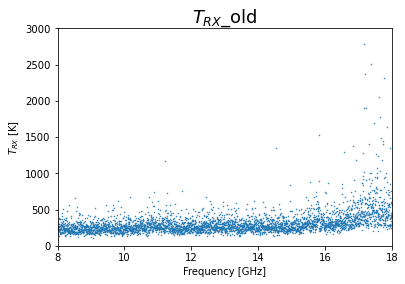

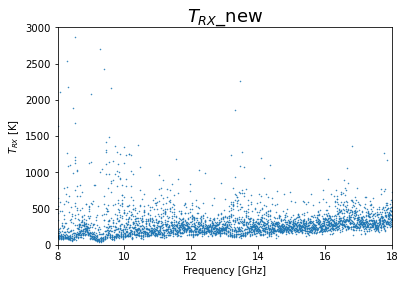

In [101]:
def TrxPlot(Trx):
    plt.plot(freq, Trx, marker='o', markersize=0.5, linestyle='')
    plt.xlabel('Frequency [GHz]') #x軸の名前
    plt.ylabel('$T_{RX}$ [K]') #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(0,3000) #y軸範囲指定

    plt.savefig(f'{outdir}/Trx.png')
    plt.show()

plt.title('$T_{RX}$_old',fontsize=18)
TrxPlot(Trx_old)

plt.title('$T_{RX}$_new',fontsize=18)
TrxPlot(Trx_new)

# plot Gain

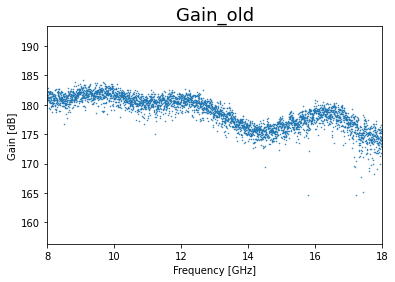

<ipython-input-100-29d82d4fdb6f>:2: RuntimeWarning: invalid value encountered in log10
  G_dB = np.log10(G)*10.;


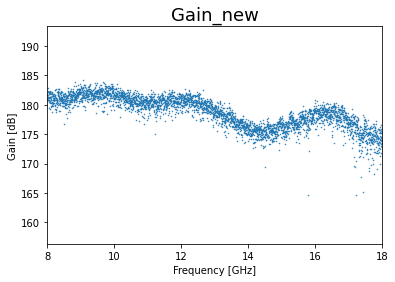

In [100]:
def GainPlot(G):
    G_dB = np.log10(G)*10.;
    plt.plot(freq, G_dB_old, marker='o', markersize=0.5, linestyle='')
    plt.xlabel('Frequency [GHz]') #x軸の名前
    plt.ylabel('Gain [dB]') #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(0.95*min(G_dB_old[G_dB_old>0.]),1.05*max(G_dB_old)) #y軸範囲指定

    plt.savefig(f'{outdir}/Gain.png')
    plt.show()

plt.title('Gain_old',fontsize=18)
GainPlot(G_old)

plt.title('Gain_new',fontsize=18)
GainPlot(G_new)

# Plot averaged power

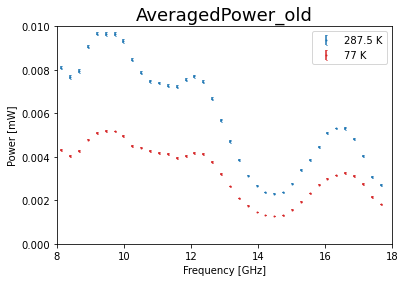

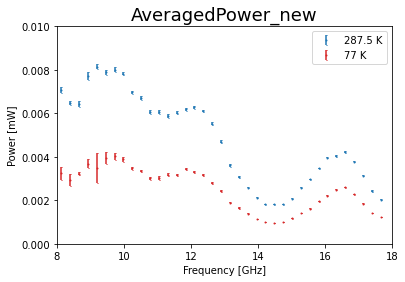

In [76]:
def averaged_power(power_300, power_77):

    freq_ave, tmp = freq_average(freq, naverage=100)
    power_300_ave, power_300_ave_err = freq_average(power_300, naverage=100)
    power_77_ave, power_77_ave_err = freq_average(power_77, naverage=100)

    plt.errorbar(freq_ave, power_300_ave, yerr=power_300_ave_err, label=f'{room_temp} K', capsize=0.5, fmt='o', markersize=1, ecolor='tab:blue', markeredgecolor = "tab:blue", color='tab:blue')
    plt.errorbar(freq_ave, power_77_ave, yerr=power_77_ave_err, label=f'77 K',  capsize=0.5, fmt='o', markersize=1, ecolor='tab:red', markeredgecolor = "tab:red", color='tab:red')

    plt.xlabel('Frequency [GHz]') #x軸の名前
    plt.ylabel('Power [mW]') #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(0,0.01) #y軸範囲指定
    plt.legend()

    plt.savefig(f"{outdir}/power_average.png")
    plt.show()
    return [power_300_ave, power_300_ave_err, power_77_ave, power_77_ave_err]

plt.title('AveragedPower_old',fontsize=18)
[power_300old_ave, power_300old_ave_err, power_77old_ave, power_77old_ave_err] = averaged_power(power_300old, power_77old)

plt.title('AveragedPower_new',fontsize=18)
[power_300new_ave, power_300new_ave_err, power_77new_ave, power_77new_ave_err] = averaged_power(power_300new, power_77new)

# AveragedTrx

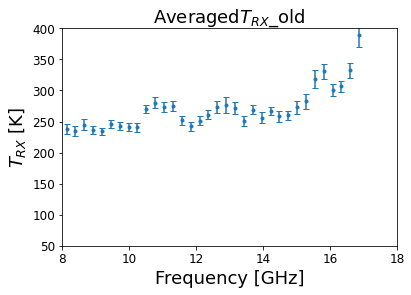

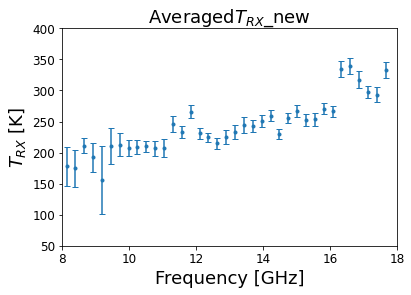

In [80]:
def AveragedTrx(power_300_ave, power_77_ave, power_300_ave_err, power_77_ave_err):
    # Calculate from Trx
    #freq_ave, tmp = freq_average(freq, naverage=100)
    #Trx_ave, Trx_err = freq_average(Trx, naverage=100)

    # Calculate from averaged powers
    [Trx_ave, G_ave],[Trx_ave_err,G_ave_err] = Yfactor(power_300_ave, power_77_ave, room_temp, 77.,power_300_ave_err, power_77_ave_err)

    plt.errorbar(freq_ave, Trx_ave, yerr=Trx_ave_err, capsize=3, fmt='o', markersize=3, ecolor='tab:blue', markeredgecolor = "tab:blue", color='tab:blue')

    plt.xlabel('Frequency [GHz]',fontsize=18) #x軸の名前
    plt.ylabel('$T_{RX}$ [K]',fontsize=18) #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(50,400) #y軸範囲指定
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(f"{outdir}/Trx_average.png")
    plt.show()
    return [Trx_ave, G_ave],[Trx_ave_err,G_ave_err]
    
plt.title('Averaged$T_{RX}$_old',fontsize=18)
[Trxold_ave, Gold_ave],[Trxold_ave_err,Gold_ave_err] = AveragedTrx(power_300old_ave, power_77old_ave, power_300old_ave_err, power_77old_ave_err)
plt.title('Averaged$T_{RX}$_new',fontsize=18)
[Trxnew_ave, Gnew_ave],[Trxnew_ave_err,Gnew_ave_err] = AveragedTrx(power_300new_ave, power_77new_ave, power_300new_ave_err, power_77new_ave_err)

# Calculate & plot NEP [W/$\sqrt{Hz}$]

In [81]:
#dnu = 3.e+6 # RBW (resolution band width) [Hz]
dnu = 10.e+3 # RBW (resolution band width) [Hz]
Tload = 300 # Tload is supposed to be 300K.

### NEP calculation

$$
\begin{align}
 T_{noise} &= T_{RX} + T_{load} \tag{5}\label{a} \\
 P_{noise} &= k_B T_{noise} \Delta \nu \tag{6}\label{b}
\end{align}
$$

<br>
<br>
$$
\begin{align}
 NEP &= \sqrt{2 P_{noise} k_B T_{noise}} \\
\mathrm{(\ref{b}) より}  &  \\
     &= \sqrt{2\Delta\nu} k_B T_{noise} \\
     &= \sqrt{2\Delta\nu} k_B (T_{rx}+T_{load}) \\
\end{align}
$$
注) $\sqrt{2}$ は $NEP$ が 0.5 sec の時間積分でのノイズを表しているため。

In [93]:
NEPold_ave = np.sqrt(2.*dnu) * k_B * (Trxold_ave + Tload)
NEPold_ave_err = np.sqrt(2.*dnu) * k_B * Trxold_ave_err

NEPnew_ave = np.sqrt(2.*dnu) * k_B * (Trxnew_ave + Tload)
NEPnew_ave_err = np.sqrt(2.*dnu) * k_B * Trxnew_ave_err

NEP_500 = np.sqrt(2.*dnu) * k_B * (500 + Tload)
print(NEP_500)

1.5620260325414811e-18


# NEPplot

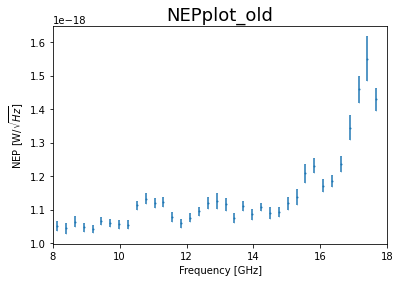

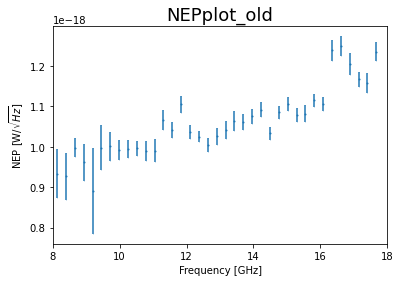

In [96]:
def NEPplot(freq_ave, NEP_ave, NEP_ave_err):
    plt.errorbar(freq_ave, NEP_ave, yerr=NEP_ave_err, capsize=0.1, fmt='o', markersize=1, ecolor='tab:blue', markeredgecolor = "tab:blue", color='tab:blue')

    plt.xlabel('Frequency [GHz]') #x軸の名前
    plt.ylabel('NEP [W/$\sqrt{Hz}$]') #y軸の名前
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    #plt.ylim(2.e-17,4e-17) #y軸範囲指定

    plt.savefig(f"{outdir}/NEP.png")
    plt.show()
    #print(NEP_ave)

plt.title('NEPplot_old',fontsize=18)
NEPplot(freq_ave, NEPold_ave, NEPold_ave_err)

plt.title('NEPplot_old',fontsize=18)
NEPplot(freq_ave, NEPnew_ave, NEPnew_ave_err)

In [97]:
#NEP = 2.7e-17 #W/√Hz
NEP = 1.05e-18 #W/√Hz
#t = 3600 * 2 #sec
t = 120 #sec
A_eff = 57 #cm^2
A_effm = A_eff * 1e-4
chi = 4.5e-14 * np.sqrt(NEP/np.sqrt(t) * 1e23 / A_effm)
print(chi)

5.835450963735081e-11


In [98]:
t_total = t *10 / 2.5e-3
t_totalday = t_total / 3600 / 24
print(t_totalday)

5.555555555555556


### far field conditions(アンテナ金属板間)

In [99]:
(2 *91.9 *91.9) / 16.65 #16.65mmは18GHzの波長

1014.4876876876879